# 변수 분포 문제 
---
- 데이터에 일반화된 모델을 학습하는데 어려움이 있는 분포를 가지는 변수가 있어, 모델을 학습하지 못하는 문제의 통칭
- 초심자가 가장 쉽게 무시하거나, 인지하지 못하는 유형의 문제
- 이 문제를 해결하지 않더라도 모델 학습에는 큰 문제가 없는 경우가 대다수 이기 때문
- 다만 이 문제를 해결하지 않으면 `좋은 모델 성능` 을 기대하기 어렵다.
---

변수 분포 문제는 크게 5개로 분류된다.

1) 특징과 라벨간 약한 관계 및 비선형 관계

2) 이상치를 포함하는 데이터 문제

3) 특징 간 상관성이 강해서 발생하는 문제

4) 변수간 스케일차이가 커서 발생하는 문제

5) 데이터의 분포가 표준분포를 따르지 않고 일반분포(분포 상태를 알수없는 상태의 통칭)일때 발생하는 문제

---

# 특징과 라벨간 관계 및 비선형 관계 (지도 모델)
---

- 특징과 라벨간 관계가 없거나 그 정도가 약하다면, 어떤 전처리 및 모델링을 한다 해도 예측력이 높은 모델을 학습할 수 없다.
- 하지만 보통은 특징과 라벨간 관계가 있음에도 숨겨져 있어 잘 보이지 않는 경우가 많다. (e.g) 비선형 관계)
- 특징과 라벨간 비선형 관계가 존재할때 적절한 전처리를 한다면, 모델 성능을 크게 향상 시킬 수 있다.
    - 이는 선형 회귀 모델, 로지스틱 회귀 모델등을 통해 검증이 된 사실이다.
---
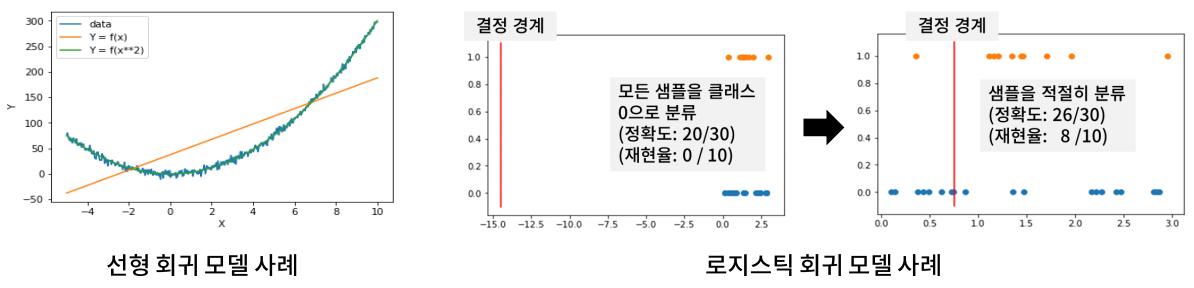

---
- 선형 회귀에서는 x, y가 위의 그림과 같이 2차원의 관계에 있을때 x를 그대로 쓰지 않고 x를 제곱한 값(전처리)를 하면 더 좋은 선형관계를 구축할 수 있다.
- 로지스틱 모델에서는 데이터의 특정 구간을 잘라서(전처리) 변수를 변환했을 때 모델의 구분 성능이 좋아지도록 할 수 있다.
- 즉, 비선형 관계인 데이터들을 전처리를 통해 선형 관계로 바꾸어 주면 모델성능의 향상을 기대할 수 있다.
---
Tip. 대다수의 머신러닝 모델은 선형식(wx + b)을 포함하고 있다. (회귀, SVM, 신경망 등)

## 특징과 라벨간 관계 파악의 현실적 어려움
---
- 만약 특징이 10개 미만이라면, 라벨과 비교해서 하나 하나 그래프를 그려서 그 관계를 가늠해볼 수 있다.
- 하지만 특징이 많은 경우 일일이 확인하기가 어렵다. 
- 설사 일일이 확인이 가능하다 하더라도, 라벨값 하나를 결정하는데 특징이 1개만 적용되는 것이 아닌 경우가 대부분이므로 관계성을 특정짓는 것이 쉽지 않다.
- 여러개의 특징과 라벨간의 관계성을 보려면 다차원 그래프를 그려야 하는데, 실질적으로 3차원 이상만 되어도 그래프로 시각화 하는 것은 어렵다.
---

## 해결방안
---
- 1) 다양한 변환방법으로 특징과 라벨간의 관계를 나타내는 특징을 만들어 확인해본다.
    - x의 제곱, log x, 두 컬럼의 합, 차 등 
- 2) 생성한 특징을 기반으로 비교하며 특징 선택을 한뒤 전처리를 한다.

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

실습용 예제 데이터 : 전력 발전량 예측용 데이터

In [2]:
df = pd.read_csv("Combined_Cycle_Power_Plant.csv")
df.head()

,T,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   EP      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
# 특징과 라벨(EP)분리
X = df.drop('EP', axis = 1)
Y = df['EP']

# 원본 데이터인 X와 특징이 추가된 데이터 X_added를 생성해 결과 비교

In [6]:
# 신규 데이터 생성
X_added = X.copy() # 특징이 추가된 데이터를 부착할 데이터

import numpy as np
# 로그와 제곱 관련 변수만 추가
for col in X.columns:
    X_added[col + '_squared'] = X[col] ** 2 # 원래 특징에 제곱한값
    X_added[col + '_log'] = np.log(X[col]) # 원래 특징에 로그값을 취한 값

# 결과 비교

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as LR

# 5겹 교차 검증 기반의 평가 수행 with negative MAE
# 5번 평가하기 때문에 mean으로 평균값을 구한다.
# cross_val_score는 shuffle이 되지 않기 때문에 인위성이 배제된다.

# 기존 데이터
X_score = cross_val_score(LR(), X, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean()

# 특징 추가한 데이터 (Y값은 동일)
X_added_score = cross_val_score(LR(), X_added, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean()

In [8]:
print("특징 추가 전:{}\n특징 추가 후:{}".format(X_score, X_added_score))

특징 추가 전:-3.628251380729045
특징 추가 후:-3.332221506782794


- Negative MAE이기때문에 결과값에도 -가 붙었다. (절대값으로 비교해도 무방)
- 특징 추가후 score가 하락 => 성능이 향상되었다.
---
- 단순한 비교이지만 특징이 추가된다고 무조건 성능이 좋아지는 것은 아니다.